# RNN Example for Sine Wave

In [67]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
Using Numpy to create a simple sine wave.

In [68]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [69]:
x[:50]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [70]:
y[:50]

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261])

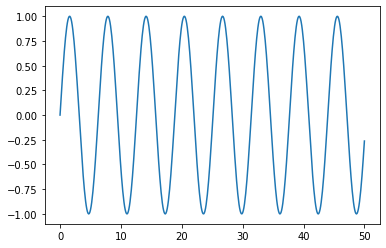

In [71]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [72]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [73]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


## Train Test Split

In [74]:
len(df)

501

In [75]:
test_percent = 0.1

In [76]:
len(df)*test_percent

50.1

In [77]:
test_point = np.round(len(df)*test_percent)

In [78]:
test_ind = int(len(df) - test_point)

In [79]:
test_ind

451

In [80]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [81]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [82]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scale Data

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [86]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [87]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [88]:
# scaled_train

In [89]:
# generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [90]:
len(scaled_train)

451

In [91]:
len(generator) # n_input = 2

449

In [92]:
# What does the first batch look like?
X,y = generator[0]

In [94]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [95]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [96]:
# What does the first batch look like?
X,y = generator[0]

In [97]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [98]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Create the Model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [100]:
# We're only using one feature in our time series
n_features = 1

In [101]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [103]:
# fit model
model.fit_generator(generator,epochs=5)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 4s 11ms/step - loss: 0.0040
Epoch 2/5
401/401 [==============================] - 4s 9ms/step - loss: 4.8974e-04
Epoch 3/5
401/401 [==============================] - 4s 9ms/step - loss: 1.1010e-04
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 8.7835e-04
Epoch 5/5
401/401 [==============================] - 4s 9ms/step - loss: 4.1842e-05


In [104]:
model.history.history.keys()

dict_keys(['loss'])

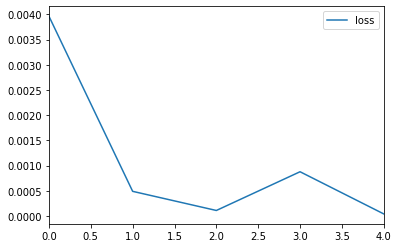

In [105]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [106]:
first_eval_batch = scaled_train[-length:]

In [107]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [108]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [109]:
model.predict(first_eval_batch)

array([[0.9500612]], dtype=float32)

In [110]:
scaled_test[0]

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [111]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [112]:
current_batch.shape

(1, 50, 1)

In [113]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [114]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [115]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [116]:
test_predictions

[array([0.9500612], dtype=float32),
 array([0.9688736], dtype=float32),
 array([0.98348665], dtype=float32),
 array([0.9924202], dtype=float32),
 array([0.99653035], dtype=float32),
 array([0.9951558], dtype=float32),
 array([0.98915786], dtype=float32),
 array([0.97817165], dtype=float32),
 array([0.9627262], dtype=float32),
 array([0.94270426], dtype=float32),
 array([0.9187933], dtype=float32),
 array([0.8907973], dtype=float32),
 array([0.8594918], dtype=float32),
 array([0.8245146], dtype=float32),
 array([0.78687775], dtype=float32),
 array([0.7460906], dtype=float32),
 array([0.70324266], dtype=float32),
 array([0.65779054], dtype=float32),
 array([0.6108872], dtype=float32),
 array([0.56210107], dtype=float32),
 array([0.5126539], dtype=float32),
 array([0.46203712], dtype=float32),
 array([0.41179466], dtype=float32),
 array([0.3612944], dtype=float32),
 array([0.31241295], dtype=float32),
 array([0.26421422], dtype=float32),
 array([0.21902579], dtype=float32),
 array([0.1755

In [117]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Inverse Transformations and Compare

In [118]:
true_predictions = scaler.inverse_transform(test_predictions)

In [119]:
true_predictions

array([[ 0.90011695],
       [ 0.93774148],
       [ 0.96696731],
       [ 0.98483426],
       [ 0.99305451],
       [ 0.99030544],
       [ 0.97830963],
       [ 0.95633739],
       [ 0.92544669],
       [ 0.88540318],
       [ 0.83758169],
       [ 0.78159013],
       [ 0.71897965],
       [ 0.64902581],
       [ 0.57375267],
       [ 0.492179  ],
       [ 0.40648383],
       [ 0.31558032],
       [ 0.22177445],
       [ 0.1242029 ],
       [ 0.02530934],
       [-0.07592339],
       [-0.17640749],
       [-0.27740723],
       [-0.37516933],
       [-0.47156601],
       [-0.56194214],
       [-0.64886007],
       [-0.7272019 ],
       [-0.80027153],
       [-0.86261753],
       [-0.91825314],
       [-0.96180556],
       [-0.9979899 ],
       [-1.02106974],
       [-1.03696364],
       [-1.03903804],
       [-1.0349065 ],
       [-1.01635444],
       [-0.99301206],
       [-0.95499031],
       [-0.91412102],
       [-0.85821995],
       [-0.80164804],
       [-0.73007483],
       [-0

In [120]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [121]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Yasser B\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
test

,Sine,Predictions
45.1,0.899097,0.900117
45.2,0.938307,0.937741
45.3,0.968142,0.966967
45.4,0.988304,0.984834
45.5,0.998591,0.993055
45.6,0.998900,0.990305
45.7,0.989229,0.978310
45.8,0.969673,0.956337
45.9,0.940429,0.925447
46.0,0.901788,0.885403


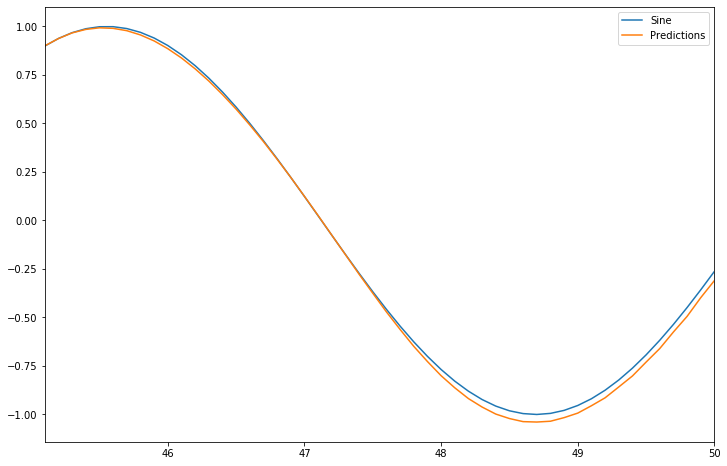

In [123]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [126]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [127]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [128]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 8s 21ms/step - loss: 0.0129 - val_loss: 4.6546e-05
Epoch 2/20
402/402 [==============================] - 6s 16ms/step - loss: 9.9983e-05 - val_loss: 1.8958e-05
Epoch 3/20
402/402 [==============================] - 7s 16ms/step - loss: 2.3851e-04 - val_loss: 1.6543e-05
Epoch 4/20
402/402 [==============================] - 7s 16ms/step - loss: 8.2756e-05 - val_loss: 1.4683e-06
Epoch 5/20
402/402 [==============================] - 6s 16ms/step - loss: 6.4259e-04 - val_loss: 2.3732e-05
Epoch 6/20
402/402 [==============================] - 7s 16ms/step - loss: 4.4509e-05 - val_loss: 4.2758e-06


In [129]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\Users\Yasser B\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


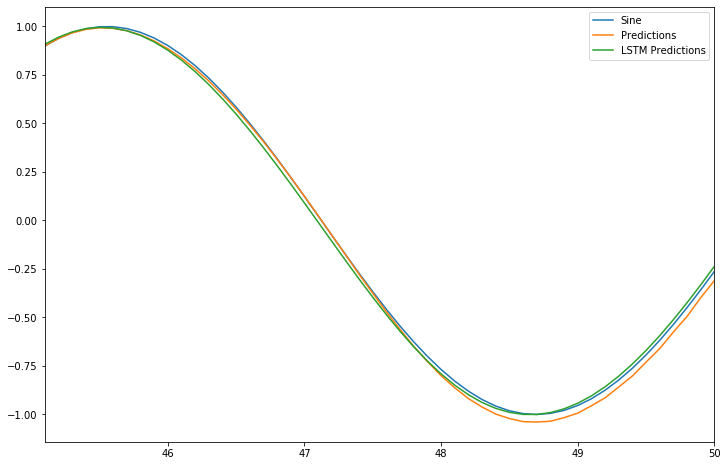

In [130]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [131]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [132]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [133]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

  ...
    to  
  ['...']
Train for 451 steps
Epoch 1/6
451/451 [==============================] - 9s 19ms/step - loss: 0.0172
Epoch 2/6
451/451 [==============================] - 7s 16ms/step - loss: 3.0250e-04
Epoch 3/6
451/451 [==============================] - 7s 16ms/step - loss: 1.4112e-04
Epoch 4/6
451/451 [==============================] - 7s 16ms/step - loss: 3.1750e-04
Epoch 5/6
451/451 [==============================] - 7s 16ms/step - loss: 1.4452e-04
Epoch 6/6
451/451 [==============================] - 7s 16ms/step - loss: 9.6372e-05


In [134]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [135]:
forecast = scaler.inverse_transform(forecast)

In [136]:
# forecast

In [137]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [138]:
len(forecast)

50

In [139]:
50*0.1

5.0

In [140]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [141]:
len(forecast_index)

50

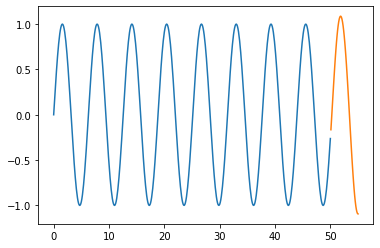

In [142]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

# Done !